# Mini Project: Exploratory Data Analysis

# Exploratory Data Analysis: Unveiling Insights from the NYC Taxi Dataset

Data has become the lifeblood of the modern world, permeating every aspect of our lives and transforming the way we make decisions. In this era of vast information, the ability to extract meaningful insights from raw data has emerged as a crucial skill. Enter exploratory data analysis (EDA), a powerful approach that allows us to unravel hidden patterns, detect anomalies, and generate valuable knowledge from the vast volumes of data at our disposal.

Exploratory data analysis serves as the initial step in any data-driven investigation, offering a comprehensive understanding of the dataset's structure, distributions, and relationships between variables. By applying statistical and visual techniques, analysts gain a deeper insight into the data, paving the way for more accurate predictions, informed decision-making, and the discovery of actionable insights.

To illustrate the significance of exploratory data analysis, we delve into one of the most popular and widely studied datasets in the field—the [NYC Taxi Dataset](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). As the name suggests, this dataset captures detailed information about taxi trips within the bustling city of New York. The NYC Taxi Dataset is an ideal choice for learning and practicing EDA techniques due to its richness, complexity, and real-world applicability.

The dataset encompasses a vast range of attributes, including pickup and drop-off locations, timestamps, trip durations, passenger counts, payment information, and much more. By exploring this data, we can gain valuable insights into the dynamics of taxi usage, understand travel patterns across different neighborhoods, identify peak hours of demand, analyze fare structures, and even uncover interesting anecdotes about the city's vibrant life.

The NYC Taxi Dataset is an excellent resource for aspiring ML practitioners to develop their EDA skills. Its scale, complexity, and real-world relevance make it an engaging playground for uncovering hidden patterns, generating hypotheses, and forming data-driven narratives.

In this mini project, we will dive deep into the NYC Taxi Dataset. We will leverage various EDA techniques to unveil meaningful insights, visualize data distributions, identify outliers, and pose insightful questions that will fuel further analysis and exploration. By the end of this colab, students will have a solid foundation in exploratory data analysis and be equipped to tackle real-world data challenges with confidence.

In [35]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the NYC taxi dataset into a Pandas DataFrame and do a few basic checks to ensure the data is loaded properly. Note, there are several months of data that can be used. For simplicity, use the Yellow Taxi 2022-01 parquet file [here](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet). Here are your tasks:

  1. Load the `yellow_tripdata_2022-01.parquet` file into Pandas.
  1. Print the first 5 rows of data. Study the schema and make sure you understand what each of the fields mean by referencing the [documentation](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf).
  1. How many rows are in the dataset? How many unique columns are in the dataset?
      1. **2463931 rows, 19 columns**
  1. Which columns have NULL values and how many NULL values are present in each of these columns?
      1. **columns with NULL values:**
          1. passenger_count
          1. RatecodeID
          1. store_and_fwd_flag
          1. congestion_surcharge
          1. airport_fee
      1. **number of NULL values in each column: 71,503 in each column**
  1. Generate summary statistics using Pandas' [describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.
      1. **Noticed two anomalies in data:**
          1. The minimum fare_amount, extra, tax, tip, tolls, surcharges, airport fee and total amounts are all negative. You would not expect these amounts to be negative. **Hypothesis for anomaly:** Data includes refunds on taxi rides?
          2. The ratecode ID has a minimum value of 1 and a maximum value of 9, but there are only 6 ratecodes possible per documentation. **Hypothesis for anomaly:** Rate codes above 6 are combination of two codes.
  1. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.

In [36]:
# Load parquet file into a Pandas DataFrame
df = pd.read_parquet(
    'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet')

In [37]:
# Display the first few rows of the dataset
print(df.head(3))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.5    3.0      0.5        3.65           0.0   
1             1          8.0    0.5      0.5        4.00           0.0   
2             1          7.5    0.5      0.5        1.76           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0        

In [5]:
# Added code to display datatypes
print(df.dtypes)

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object


In [6]:
# Display the shape of the dataset
print(df.shape)

(2463931, 19)


In [7]:
# Check for missing values

# count number of missing values per column
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

In [8]:
# Summary statistics of the dataset
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689726208,2022-01-17 01:34:04.421900544,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


In [38]:
# Drop rows with missing values.

# create new dataframe with no missing values
new_df = df.dropna(how = 'any')

# confirm number of rows is less than original dataframe and columns have no missing values
print(new_df.shape, '\n')
print(new_df.isna().any())

(2392428, 19) 

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
airport_fee              False
dtype: bool


Feature engineering is a critical process in machine learning that involves selecting, transforming, and creating features from raw data to improve the performance and accuracy of predictive models. While machine learning algorithms have the capability to automatically learn patterns from data, the quality and relevance of the features used as inputs greatly influence the model's ability to generalize and make accurate predictions. Feature engineering, therefore, plays a crucial role in extracting meaningful information and representing it in a format that best captures the underlying relationships within the data.

Here are your tasks:

  1. Create a new feature that calculates the trip duration in minutes.
  2. Create additional features for the pick-up day of week and pick-up hour.
  3. Use the Seaborn library to create a [line plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) depicting the number of trips as a function of the hour of day. What's the busiest time of day?
      1. **Busiest time is late afternoon, running from 3 pm through 6 pm. Busiest hour is 6pm.**
  4. Create another lineplot depicting the number of trips as a function of the day of week. What day of the week is the least busy?
      1. **Tuesday**

In [ ]:
# Create a new column for trip duration in minutes

## Performed several steps to create new column for trip duration
1. Check if trip duration calculations would return negative values
1. Since minimum trip duration is negative, determine what timezones are set on pickup and dropoff columns
1. Current times are in UTC; update columns to reflect New York time zone since times come from NYC taxi transactions
1. Recalculate trip duration and determine if it still has any negative values after updating time zones.
1. Trip duration still had negative values. Continued creating new column despite negative values in calculations
1. Verified max trip duration calculated as timedelta equaled total minutes calculated
1. Used calculations verified above to set new column called 'trip_duration'

In [39]:
# Check if trip duration calculations would return negative values
trip_duration = new_df[
    'tpep_dropoff_datetime'] - new_df['tpep_pickup_datetime']

print('max trip duration =', trip_duration.max())
print('min trip duration =', trip_duration.min())

max trip duration = 5 days 21:53:11
min trip duration = -3 days +14:37:36


In [11]:
# Since minimum trip duration is negative, determine what timezones are set on pickup and dropoff columns
print(type(new_df.tpep_dropoff_datetime[0]), type(new_df.tpep_pickup_datetime[0]))
print(f"first 3 rows of pickup column:\n{new_df.tpep_pickup_datetime.head(3)}\n\nfirst 3 rows of dropoff column:\n{new_df.tpep_dropoff_datetime.head(3)}")

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
first 3 rows of pickup column:
0   2022-01-01 00:35:40
1   2022-01-01 00:33:43
2   2022-01-01 00:53:21
Name: tpep_pickup_datetime, dtype: datetime64[ns]

first 3 rows of dropoff column:
0   2022-01-01 00:53:29
1   2022-01-01 00:42:07
2   2022-01-01 01:02:19
Name: tpep_dropoff_datetime, dtype: datetime64[ns]


In [12]:
# Current times are in UTC; update columns to reflect New York time zone since times come from NYC taxi transactions
new_df['tpep_pickup_datetime'] = new_df[
    'tpep_pickup_datetime'].dt.tz_localize('America/New_York', ambiguous='NaT')

new_df['tpep_dropoff_datetime'] = new_df[
    'tpep_dropoff_datetime'].dt.tz_localize('America/New_York', ambiguous='NaT')

# verify pickup and dropoff columns are now set to New York time zone
print(f"first 3 rows of pickup column:\n{new_df.tpep_pickup_datetime.head(3)}\n\nfirst 3 rows of dropoff column:\n{new_df.tpep_dropoff_datetime.head(3)}")

first 3 rows of pickup column:
0   2022-01-01 00:35:40-05:00
1   2022-01-01 00:33:43-05:00
2   2022-01-01 00:53:21-05:00
Name: tpep_pickup_datetime, dtype: datetime64[ns, America/New_York]

first 3 rows of dropoff column:
0   2022-01-01 00:53:29-05:00
1   2022-01-01 00:42:07-05:00
2   2022-01-01 01:02:19-05:00
Name: tpep_dropoff_datetime, dtype: datetime64[ns, America/New_York]


In [13]:
# Recalculate trip duration and determine if it still has any negative values after updating time zones
trip_duration = new_df[
    'tpep_dropoff_datetime'] - new_df['tpep_pickup_datetime']
print('max trip duration =', trip_duration.max())
print('min trip duration =', trip_duration.min())

max trip duration = 5 days 21:53:11
min trip duration = -3 days +14:37:36


trips less than zero minutes: 1
trips more than 1 day: 13


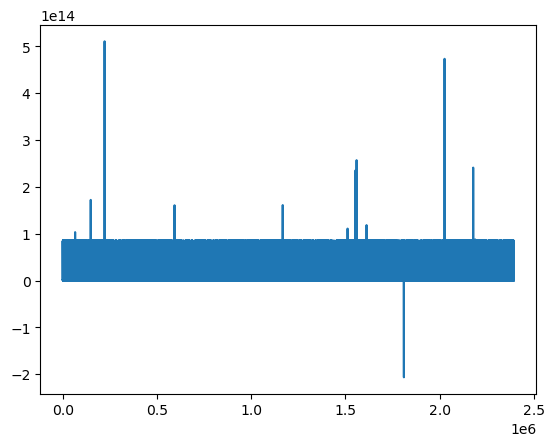

In [14]:
# view plot of trip_duration by time in days
# determine how many trips were less than 0 minutes or more than 1 day
trip_duration.plot()
print(f'trips less than zero minutes: {((trip_duration.dt.total_seconds() // 60) < 0).sum()}')
print(f'trips more than 1 day: {((trip_duration.dt.total_seconds() // 60) > 1440).sum()}')

Will create trip_duration column even though one entry will contain a negative value.

Will verify conversion from days to minutes via code makes sense based on manual calculations before creating the trip_duration column in minutes.

When subtracting the dropoff timedeltas from the pickup timedeltas, the following max and min times were calculated:
* max trip_duration: 5 days, 21 hours, 53 minutes
* min trip_duration: -3 days, +14 hours, +37 minutes

Converting max time into minutes: 
* 5 days =   7,200 minutes
* 21 hours = 1,260 minutes
* 53 minutes =  53 minutes
* **TOTAL =   8,513 minutes**

Converting min time into minutes:
* -3 days =  -4,320 minutes
* +14 hours =  +840 minutes
* +37 minutes = +37 minutes
* **TOTAL =    -3,443 minutes**

In [40]:
# verify coded conversion to minutes makes sense with manual calculations
print('manual max trip duration in minutes = 8,513')
print(f'coded max trip duration in minutes = {trip_duration.dt.total_seconds().max() // 60}\n')
print('manual min trip duration in minutes = -3,443')
print(f'coded min trip duration in minutes = {trip_duration.dt.total_seconds().min() // 60}')

manual max trip duration in minutes = 8,513
coded max trip duration in minutes = 8513.0

manual min trip duration in minutes = -3,443
coded min trip duration in minutes = -3443.0


In [41]:
# create new column called 'trip_duration'
new_df['trip_duration'] = trip_duration.dt.total_seconds() // 60

# print first few rows to ensure new column is included in dataframe
print(new_df.head(3))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.5    3.0      0.5        3.65           0.0   
1             1          8.0    0.5      0.5        4.00           0.0   
2             1          7.5    0.5      0.5        1.76           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0       

In [42]:
# Create new columns for pickup hour and day of week

# create column for pickup hour
new_df['pickup_hr'] = new_df.tpep_pickup_datetime.dt.hour

# create column for pickup day of the week
new_df['pickup_weekday'] = new_df.tpep_pickup_datetime.dt.day_name()

# print first few rows to ensure new columns are in dataframe
new_df[['pickup_hr','pickup_weekday']].head(3)

,pickup_hr,pickup_weekday
0,0,Saturday
1,0,Saturday
2,0,Saturday


<Axes: xlabel='pickup_hr'>

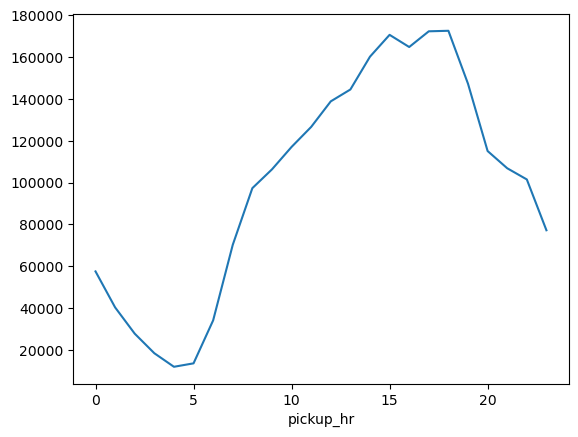

In [43]:
# Create a lineplot displaying the number of trips by pickup hour
new_df.groupby('pickup_hr').size().plot()

<Axes: xlabel='pickup_weekday'>

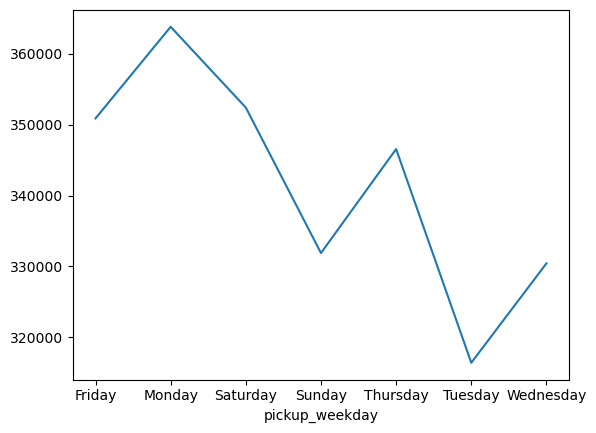

In [20]:
# Create a lineplot displaying the number of trips by pickup day

# clear previous plot information
plt.clf()

# create lineplot
new_df.groupby('pickup_weekday').size().plot()

The line plot above displays days of the week in alphabetical order. To view traffic in a chronological order, will create a new line plot ordering the days from Monday to Sunday.

The new plot shows that Tuesday is the slowest day of the week, then traffic picks up consistently each day through Saturday. Then traffic drops slightly on Sunday. Finally, traffic reaches its peak number of rides on Monday.

<Axes: xlabel='pickup_weekday'>

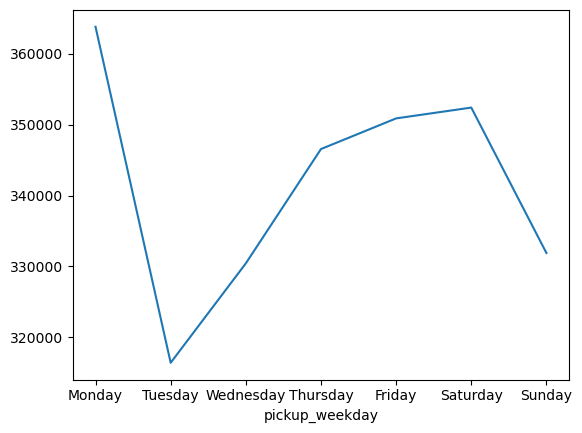

In [21]:
# clear previous plot information
plt.clf()

# create variable holding order to display days of the week in plot
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'pickup_weekday' to a categorical variable with the specified order of days above
new_df['pickup_weekday'] = pd.Categorical(
    new_df['pickup_weekday'], categories=weekday_order, ordered=True)

# display number of pickups by day, ordered by weekday_order from above
new_df.groupby('pickup_weekday').size().sort_index().plot()

In [22]:
# convert pickup_weekday datatype back to string
new_df['pickup_weekday'] = new_df['pickup_weekday'].astype('str')

In the realm of machine learning, understanding the relationships between variables is crucial for building accurate and effective predictive models. One powerful tool for exploring these relationships is the correlation matrix. A correlation matrix provides a comprehensive overview of the pairwise correlations between variables in a dataset, allowing practitioners to quantify and visualize the strength and direction of these associations. This matrix is an essential component of exploratory data analysis and offers several key benefits:

1. Relationship Assessment: The correlation matrix provides a quantitative measure of the relationship between variables. By calculating correlation coefficients, typically using methods like Pearson's correlation coefficient, analysts can determine if variables are positively correlated (increase together), negatively correlated (one increases as the other decreases), or uncorrelated (no systematic relationship). These measures offer insights into the direction and strength of the relationships, helping to identify important variables that may influence the target variable.

2. Feature Selection: Correlation matrices are invaluable in feature selection, which involves identifying the most relevant variables for building predictive models. By examining the correlations between the target variable and other features, analysts can identify highly correlated variables that may be strong predictors. This knowledge enables informed decisions regarding which variables to include in the model, potentially reducing dimensionality, enhancing model efficiency, and preventing issues such as multicollinearity.

3. Multicollinearity Detection: Multicollinearity occurs when two or more independent variables in a model are highly correlated. This can lead to problems such as instability in coefficient estimates, difficulty in interpreting feature importance, and reduced model robustness. By examining the correlation matrix, analysts can identify highly correlated variables and make informed decisions about which ones to include or exclude to mitigate multicollinearity. Removing redundant variables improves model interpretability and generalization.

Here is your task:

  1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?
      1. **fair_amount and total_amount are almost perfectly correlated**
      1. **tip_amount and trip_distance are the only other variables that have a correlation, but it is only around .5**

<Figure size 640x480 with 0 Axes>

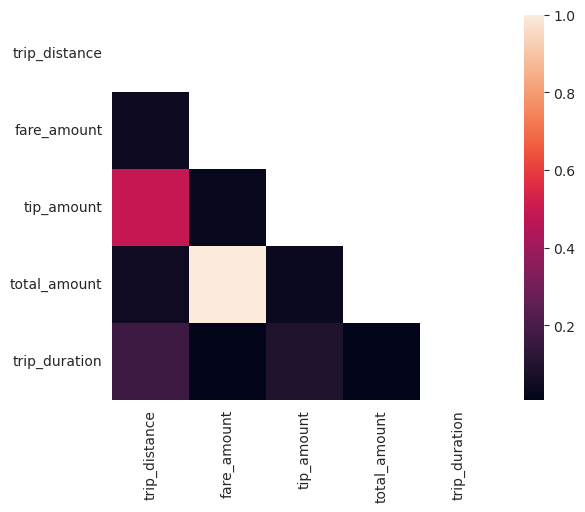

In [23]:
# Compute correlation matrix of numerical variables

#create separate dataframe containing numerical values to correlate
corr_df = new_df[
    ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']]

corr = corr_df.corr()

# clear previous plot information
plt.clf()

# Create a heatmap of the correlation matrix
import numpy as np

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

Pairplots, also known as scatterplot matrices, allow for the visualization of pairwise relationships between multiple variables simultaneously. Each subplot in the pairplot represents the scatterplot of one variable against another. Pairplots offer several advantages in EDA:

  - Variable Relationships: Pairplots enable analysts to explore the relationships between variables, revealing patterns such as linear or nonlinear correlations, clusters, or other associations. These visual cues guide further analysis, feature selection, or modeling decisions.

  - Multivariate Analysis: Pairplots help identify multivariate dependencies and interactions, highlighting how different variables jointly influence one another. This is particularly valuable in identifying potential confounding factors or discovering hidden interactions that may not be apparent when considering variables in isolation.

  - Outlier Detection: Pairplots can reveal potential outliers by showing data points that deviate significantly from the general pattern observed between variables. Outliers can indicate data anomalies or influential observations that may impact model performance.

  - Feature Importance: Pairplots provide an intuitive representation of the relative importance of different features. Variables exhibiting strong correlations or clear patterns may be more relevant for predictive modeling or feature selection.

  - Data Quality: Pairplots can help identify data quality issues, such as data entry errors or measurement inconsistencies. Patterns that do not align with expectations or exhibit unusual trends may signal data problems that require further investigation or preprocessing.

Here is your task:

  1. Create a [pairplot matrix](https://seaborn.pydata.org/generated/seaborn.pairplot.html) using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the [sample method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?
      1. **strong relationship: between total_amount and fair_amount**
      2. **no relationship: between trip_distance and other variables; plots are shaped like the letter L, indicating no linear relationship**

<Figure size 640x480 with 0 Axes>

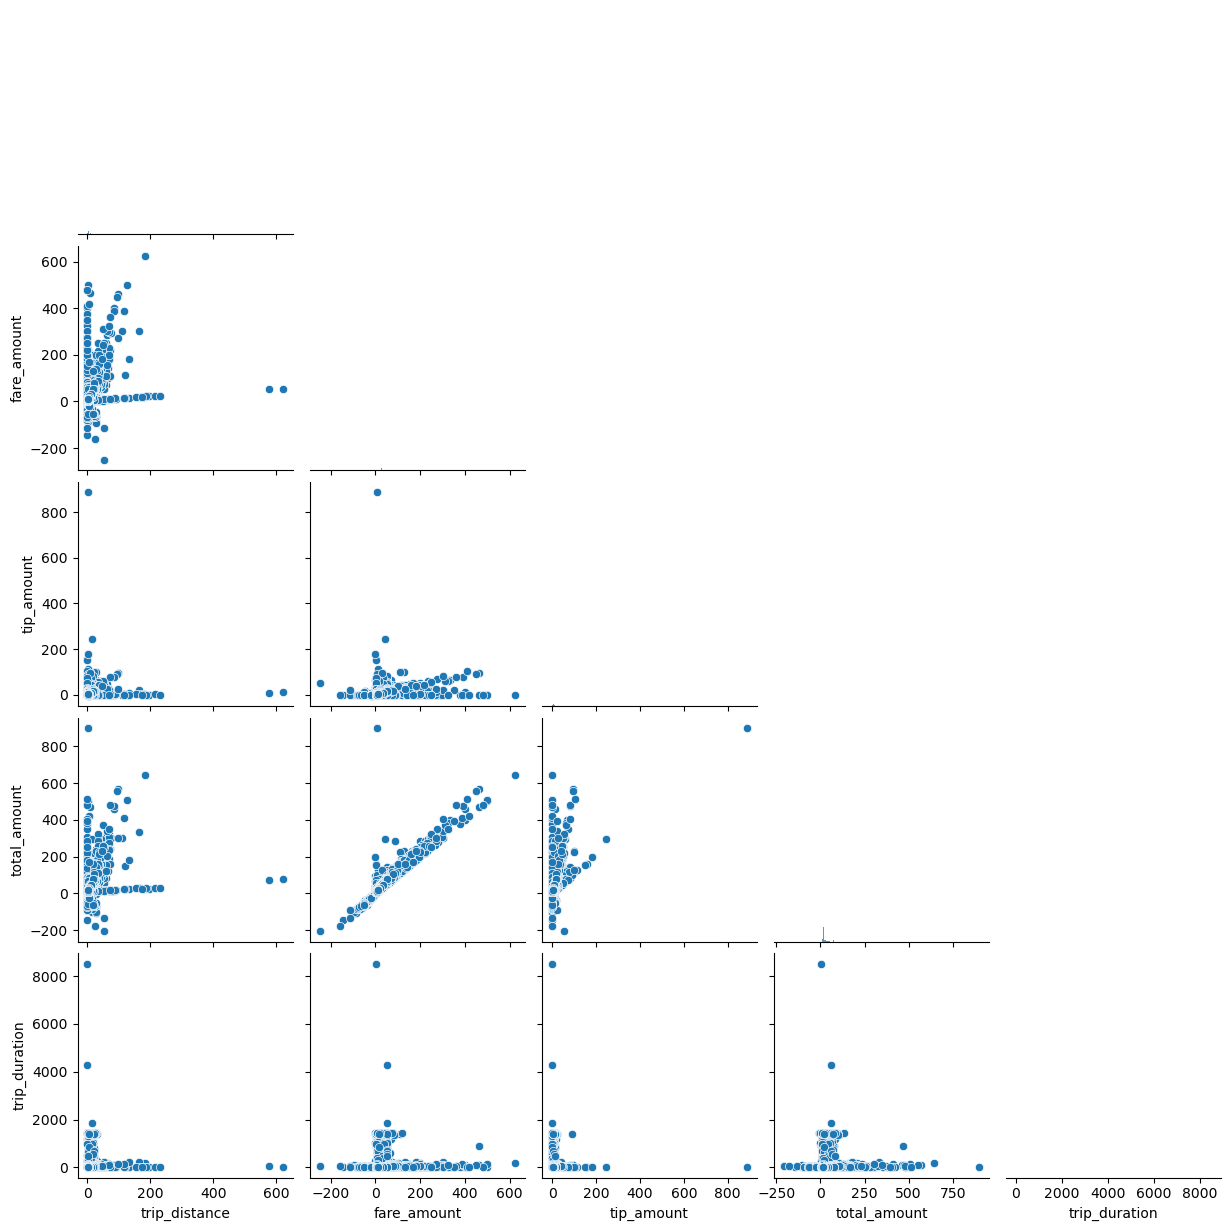

In [24]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.

# create sample size of 25% of current corr_df
sample_df = corr_df.sample(frac = .25)

# clear previous plot information
plt.clf()

# create scatter plot matrix using pairplot() method & sample_df
sns.pairplot(sample_df, corner=True)

# create scatter plot matrix using PairGrid() method
#g = sns.PairGrid(sample_df, corner=True)
#g.map(plt.scatter);

A count plot is a type of categorical plot that displays the number of occurrences of each category in a dataset. It is particularly useful for visualizing the distribution and frequency of categorical variables. Here are some key uses and benefits of count plots:

  - Categorical Variable Exploration: Count plots provide a quick and concise summary of the distribution of categorical variables. They allow analysts to understand the frequency or count of each category, revealing the proportions and imbalances within the dataset. This information is crucial for gaining insights into the composition and characteristics of categorical variables.

  - Class Imbalance Assessment: In classification tasks, count plots help assess the balance or imbalance of different target classes. It provides a visual representation of the distribution of classes, highlighting any significant discrepancies in the sample sizes across categories. Identifying imbalanced classes is important in machine learning as it can affect model performance and bias the predictions towards the majority class.

  - Data Quality Inspection: Count plots can be utilized to detect data quality issues in categorical variables. It allows analysts to identify unexpected or erroneous categories that may indicate data entry errors, missing data, or inconsistencies in the dataset. By observing the counts for each category, anomalies or discrepancies can be easily spotted, enabling data cleaning or further investigation if necessary.

  - Feature Importance Evaluation: Count plots can provide insights into the importance or relevance of different categorical features in relation to the target variable. By visualizing the distribution of categories within each class or target level, analysts can determine which categories are more prevalent or have higher frequencies for specific outcomes. This understanding helps in assessing the discriminatory power of categorical features and their potential impact on predictive models.

Here is your task:

  1. Use Seaborn to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?
      1. **LocationID 237, followed closely by LocationID 236**

When comparing the below countplots between pickup and dropoff locations, the top two locations for pickup and dropoff are LocationID 236 and 237. 

With pickup locations, 237 is the most popular and 236 is close behind as the number two pickup location.  

With dropoff locations, 236 is the most popular but 237 is the second most popular by a significantly lower number of rides.

In [25]:
# Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.

# first create dataframes holding only the rows of the top 15 PULocations or the top 15 DOLocations, respectively
# create variables for top 15 pick up and drop off locations
top_pu_series = new_df['PULocationID'].value_counts().head(15)
top_do_series = new_df['DOLocationID'].value_counts().head(15)

# create data frame listing top 15 PU and DO locations
top_df = pd.DataFrame({'top_pu': top_pu_series.index, 'top_do': top_do_series.index})

#create list of top PU and DO values
top_pu = list(top_df.top_pu.sort_values())
top_do = list(top_df.top_do.sort_values())

# create df with all rows containing top 15 PULocations
top_pu_df = new_df[new_df['PULocationID'].isin(top_pu)]

# create df with all rows containing top 15 DOLocations
top_do_df = new_df[new_df['DOLocationID'].isin(top_do)]

<Axes: xlabel='count', ylabel='PULocationID'>

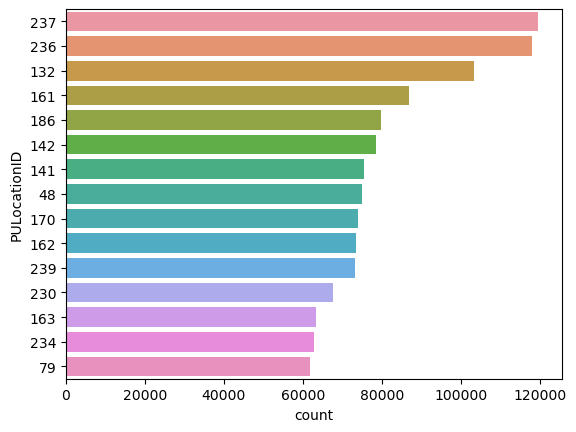

In [26]:
# clear previous plot information
plt.clf()

# display countplot for top 15 pickup locations in order of highest to lowest count
sns.countplot(data=top_pu_df,
              y='PULocationID',
              order=top_pu_df['PULocationID'].value_counts().index)

<Axes: xlabel='count', ylabel='DOLocationID'>

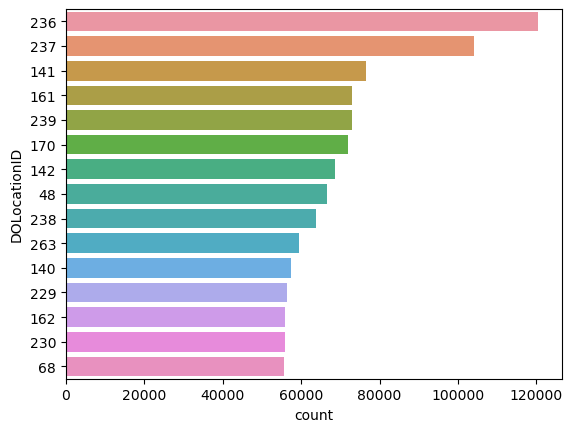

In [27]:
# clear previous plot information
plt.clf()

# display countplot for top 15 dropoff locations in order of highest to lowest count
sns.countplot(data=top_do_df,
              y='DOLocationID',
              order=top_do_df['DOLocationID'].value_counts().index)

A box plot, also known as a box-and-whisker plot, is a powerful visualization tool for displaying the distribution, variability, and outliers within a numerical dataset. It provides a concise summary of key statistical measures and offers several important uses:

  - Data Distribution and Skewness: Box plots offer a visual representation of the distribution of numerical data, providing insights into its central tendency, spread, and skewness. The box represents the interquartile range (IQR), which contains the middle 50% of the data, with the median indicated by a horizontal line within the box. By observing the length and symmetry of the box, analysts can assess whether the data is skewed or symmetrically distributed.

  - Outlier Detection: Box plots are highly effective in identifying outliers, which are data points that deviate significantly from the rest of the distribution. The whiskers of the plot extend to the minimum and maximum non-outlier values, with any data points beyond the whiskers considered as potential outliers. Outliers can indicate data errors, anomalies, or important observations requiring further investigation.

  - Comparing Groups or Categories: Box plots are useful for comparing the distributions of numerical data across different groups or categories. By creating side-by-side or grouped box plots, analysts can easily compare the central tendencies, spreads, and shapes of distributions between different groups. This allows for the identification of differences, similarities, or patterns within the data.

  - Variability and Spread: Box plots provide insights into the variability and spread of the data. The length of the box indicates the spread of the middle 50% of the data, while the whiskers show the range of non-outlier values. By comparing the lengths of the boxes and whiskers, analysts can assess the relative variability between different groups or categories, aiding in the understanding of the data's dispersion.

  - Skewedness and Symmetry: Box plots offer a visual assessment of the skewness or symmetry of the data distribution. A symmetrical distribution is represented by a box plot with an equal length on both sides of the median, while a skewed distribution is indicated by a longer box on one side. This visual cue helps in understanding the shape and characteristics of the data, assisting in further analysis and modeling decisions.

  - Data Range and Quartiles: Box plots display the quartiles of the data distribution. The lower quartile (Q1) represents the 25th percentile, the upper quartile (Q3) represents the 75th percentile, and the interquartile range (IQR) is the range between Q1 and Q3. These quartiles provide a summary of the range and spread of the central portion of the data, aiding in the understanding of the data's variability and dispersion.

Your task is:

  1. Use Seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to discern the relationship between payment_type and total_amount. Does anything look weird? Can you explain what's going on?
      1. **payment_type 4 has an extreme outlier, so all of the boxplot boxes are crammed into a small space relative to the total_amount range. It is hard to see any other relationships besides the fact that payment_type 4 has an extreme outlier value.**

<Axes: xlabel='payment_type', ylabel='total_amount'>

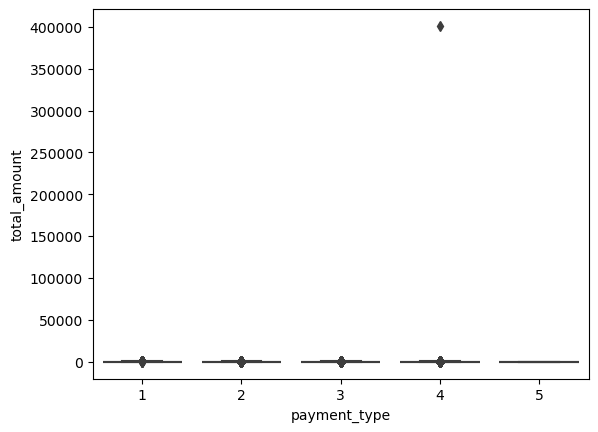

In [28]:
# clear previous plot information
plt.clf()

# Create a box plot of total amount by payment type. Do you see anything odd?
sns.boxplot(data=new_df, y='total_amount', x='payment_type')

A histogram is a graphical representation that displays the distribution of a continuous or discrete numerical variable. It provides insights into the underlying data distribution and helps uncover patterns, frequencies, and ranges within the dataset. Here are some key uses and benefits of histogram plots:

  - Data Distribution: Histograms allow analysts to visualize the shape, central tendency, and spread of the data. They provide an overview of the data distribution, helping to identify if it follows a particular pattern, such as a normal distribution, skewed distribution, bimodal distribution, or multimodal distribution. Understanding the data distribution aids in selecting appropriate analysis techniques and understanding the characteristics of the data.

  - Frequency Analysis: Histograms display the frequency or count of data points within predefined bins or intervals along the x-axis. By observing the height or count of each bin, analysts can identify the frequency of occurrence for different values or value ranges. This information helps assess the concentration of data points and identify peaks or modes in the distribution.

  - Outlier Detection: Histograms can assist in identifying outliers, which are data points that significantly deviate from the rest of the distribution. Outliers may indicate data errors, unusual observations, or important anomalies requiring further investigation. By examining the tails or extreme values in the histogram, analysts can identify potential outliers that may require additional scrutiny.

  - Data Range and Spread: Histograms provide insights into the range and spread of the data. The x-axis represents the variable's values, while the y-axis represents the frequency or count of occurrences. By observing the width and span of the histogram, analysts can assess the data's range and variability. This information helps understand the data's spread and aids in subsequent analysis or decision-making processes.

  - Feature Engineering: Histograms can guide feature engineering processes by informing appropriate transformations, binning strategies, or encoding techniques for numerical variables. They assist in identifying nonlinear relationships or determining optimal cut-off points for converting continuous variables into categorical ones. Histograms also help identify data skewness and guide transformation methods to address the skew if necessary.

  - Data Quality Inspection: Histograms can be useful in detecting data quality issues or anomalies. Unusual spikes, gaps, or unexpected patterns in the histogram may indicate data entry errors, measurement inconsistencies, or missing data. By observing the histogram, analysts can identify potential data quality issues that require further investigation or preprocessing.

Your task is:

  1. Use Seaborn's [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to explore the data distributions for fare_amount, trip_distance, and extra. Use kernel density estimators to better visualize the distribution. Use sampling if you run into any memory issues.
* **Fare amount** distribution is highly right skewed. Gradually declines but has a small uptick in count near the 50 dollar amount.
* The **trip distance** distribution is highly right skewed. Gradually declines but has a small uptick in count near the 20 mile mark. Similar to **fare amount** category.
* Largest grouping of rides do not have any **extra** fees added. The peaks appear in 50 cent intervals. However, there are limited counts for 1.50 and 2 dollar fees.

In [29]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot. Sample the data if you run into memory issues.

# create sub dataframe with only specific columns to review & sample of 25% of original dataframe
hist_df = new_df[['fare_amount', 'trip_distance', 'extra']]
sample_hist = hist_df.sample(frac = .25)

<Axes: xlabel='fare_amount', ylabel='Count'>

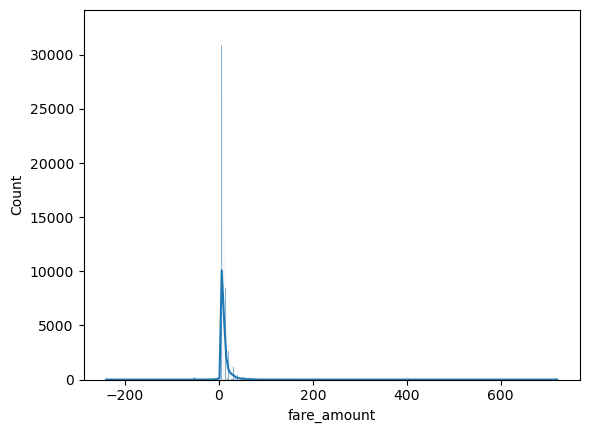

In [30]:
# clear previous plot information
plt.clf()

# create histplot for fare_amount
sns.histplot(data=sample_hist, x='fare_amount', kde=True)

<Axes: xlabel='trip_distance', ylabel='Count'>

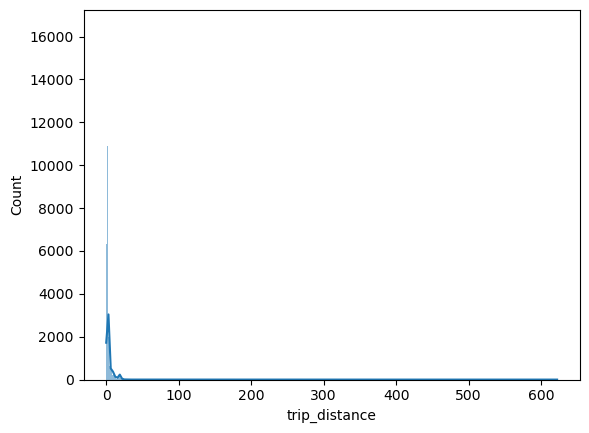

In [31]:
# clear previous plot information
plt.clf()

# create histplot for trip distance
sns.histplot(data=sample_hist, x='trip_distance', kde=True)

([<matplotlib.axis.XTick at 0x7f19b4d42a40>,
 [Text(-6, 0, '−6'),
  Text(-4, 0, '−4'),
  Text(-2, 0, '−2'),
  Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(26, 0, '26')])

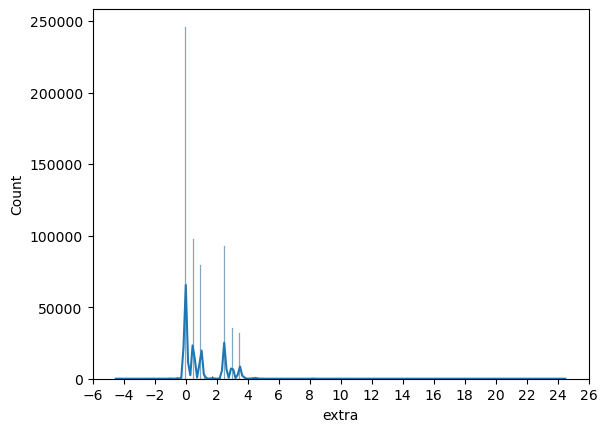

In [34]:
# clear previous plot information
plt.clf()

# create histplot for extra
sns.histplot(data=sample_hist, x='extra', kde=True)
x_values = [-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26]
plt.xticks(x_values)